# Applying supervised Classification algorithms on data for classifying rock formation types.  

firstly , import required libraries 


In [83]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


In [75]:
df=pd.read_csv('D:/python/my work/hoss/Chapter-7/Chapter 7/Chapter7_Facies Data.CSV')
df
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Facies,3232.0,4.422030,2.504243,1.000000,2.00000,4.000000,6.000000,9.000
Depth,3232.0,2875.824567,131.006274,2573.500000,2791.00000,2893.500000,2980.000000,3122.500
GR,3232.0,66.135769,30.854826,13.250000,46.91875,65.721500,79.626250,361.150
ILD_log10,3232.0,0.642719,0.241845,-0.025949,0.49275,0.624437,0.812735,1.480
DeltaPHI,3232.0,3.559642,5.228948,-21.832000,1.16375,3.500000,6.432500,18.600
PHIND,3232.0,13.483213,7.698980,0.550000,8.34675,12.150000,16.453750,84.400
PE,3232.0,3.725014,0.896152,0.200000,3.10000,3.551500,4.300000,8.094
NM_M,3232.0,1.498453,0.500075,1.000000,1.00000,1.000000,2.000000,2.000
RELPOS,3232.0,0.520287,0.286792,0.010000,0.27300,0.526000,0.767250,1.000


D:\python\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\python\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

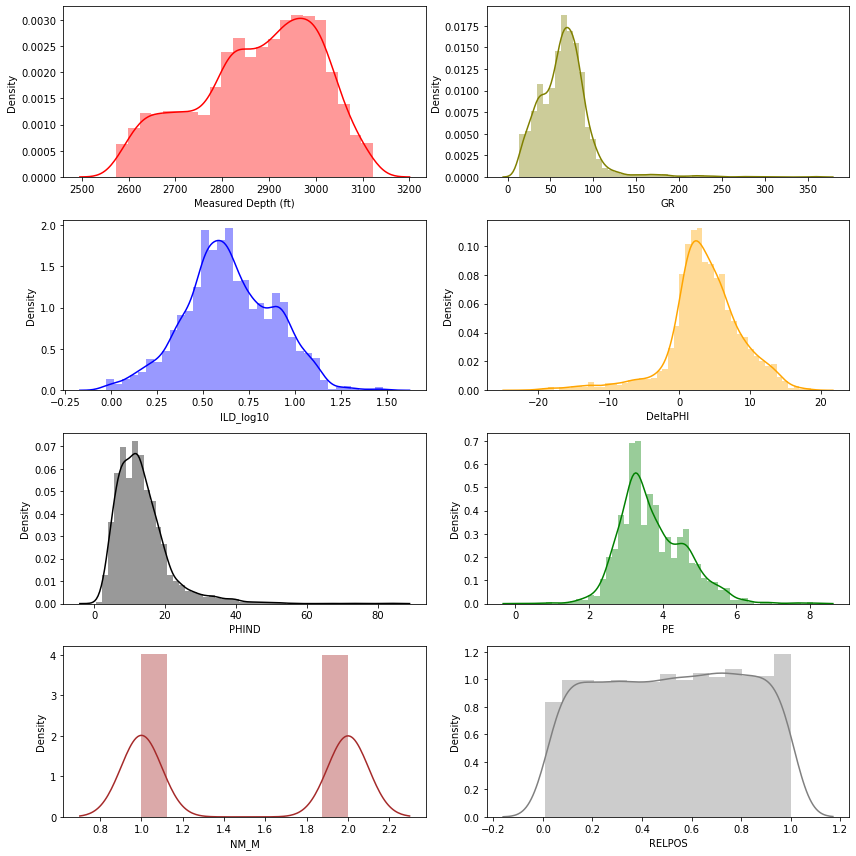

In [76]:
f, axes =plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df['Depth'], color="red", ax=axes[0, 0],
axlabel='Measured Depth (ft)')

sns.distplot(df['GR'], color="olive", ax=axes[0, 1],
axlabel='GR')

sns.distplot(df['ILD_log10'],color="blue",ax=axes[1,0],axlabel='ILD_log10')

#sns.distplot(df['Rate Of Penetration'], color="blue", ax=axes
#[1, 0],axlabel='Rate of Penetration (ft/hr)')

sns.distplot(df['DeltaPHI'], color="orange", ax=axes[1, 1],
axlabel='DeltaPHI')

sns.distplot(df['PHIND'], color="black",
ax=axes[2, 0],axlabel='PHIND')

sns.distplot(df['PE'], color="green",
ax=axes[2, 1],axlabel='PE')

sns.distplot(df['NM_M'], color="brown",
ax=axes[3, 0],axlabel='NM_M')

sns.distplot(df['RELPOS'], color="gray", ax=axes[3, 1],
axlabel='RELPOS')

#sns.distplot(df["Rate Of Penetration"],color="red",ax=axes[3,1],
#axlabel="Rate of pentration")
plt.tight_layout()
plt.show()

D:\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\New folder\lib\site-packages\seab

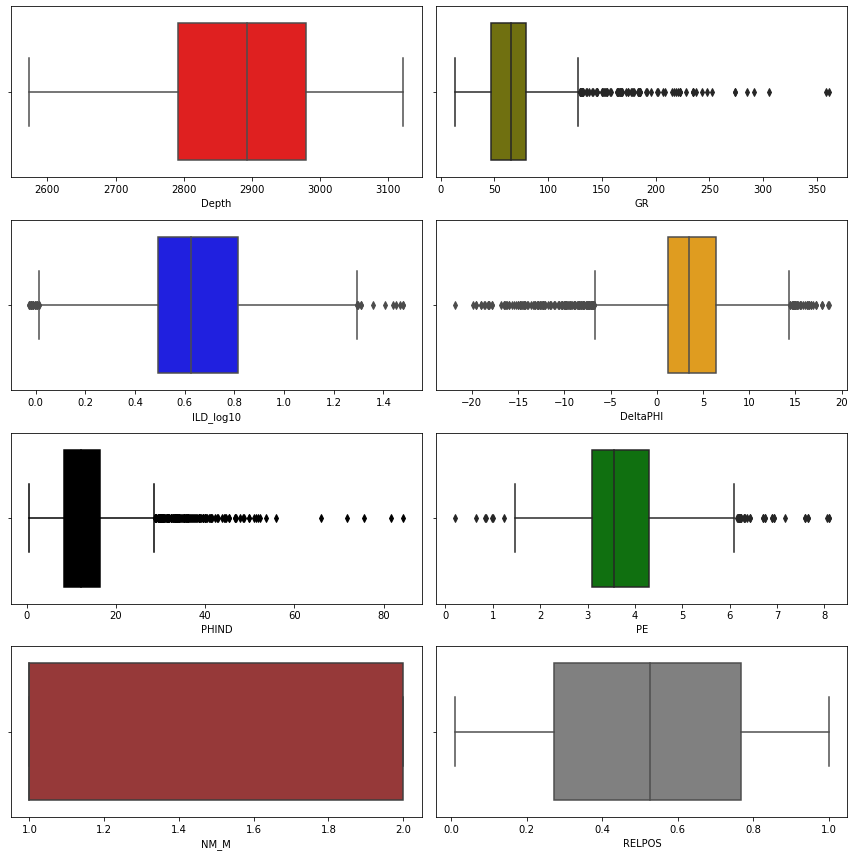

In [78]:
f, axes =plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Depth'], color="red", ax=axes[0, 0])

sns.boxplot(df['GR'], color="olive", ax=axes[0, 1])

sns.boxplot(df['ILD_log10'],color="blue",ax=axes[1,0])

#sns.boxplot(df['Rate Of Penetration'], color="blue", ax=axes
#[1, 0], 'Rate of Penetration (ft/hr)')

sns.boxplot(df['DeltaPHI'], color="orange", ax=axes[1, 1])

sns.boxplot(df['PHIND'], color="black",
ax=axes[2, 0])

sns.boxplot(df['PE'], color="green",
ax=axes[2, 1])

sns.boxplot(df['NM_M'], color="brown",
ax=axes[3, 0])

sns.boxplot(df['RELPOS'], color="gray", ax=axes[3, 1]
 )

#sns.boxplot(df["Rate Of Penetration"],color="red",ax=axes[3,1],
# "Rate of pentration")
plt.tight_layout()
plt.show()

In [17]:
df


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


for more information about the relation between each feature and facies  

In [197]:

df[["Facies", 'Formation']].groupby(['Formation'], as_index=False).count().sort_values(by='Formation', ascending=False)
#df[["Facies", 'Formation']].groupby(['Facies'], as_index=False).count().sort_values(by='Formation', ascending=False)
#df[["Facies", 'PE']].groupby(['Facies'], as_index=True).mean().sort_values(by='PE', ascending=False)
#df[["Facies", 'DeltaPHI']].groupby(['Facies'], as_index=True).mean().sort_values(by='DeltaPHI', ascending=False)

,Formation,Facies
13,C SH,305
12,C LM,483
11,B5 SH,79
10,B5 LM,286
9,B4 SH,217
8,B4 LM,71
7,B3 SH,220
6,B3 LM,57
5,B2 SH,175
4,B2 LM,133


In [201]:
df[["Facies", 'Formation']].groupby(['Facies'], as_index=False).count().sort_values(by='Formation', ascending=False)


,Facies,Formation
1,2,738
2,3,615
7,8,498
5,6,462
0,1,259
4,5,217
3,4,184
8,9,161
6,7,98


In [68]:
def groupby():
    columns=['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
    for x in columns:
       df[["Facies", x]].groupby(['Facies'], as_index=True).mean().sort_values(by=x, ascending=False)
groupby()
    

In [ ]:
#grid = sns.FacetGrid(df, row='NM_M', size=2.2, aspect=1.6)
#grid.map(sns.hist, 'PHIND', 'Facies', palette='deep')
#grid.add_legend()

X is the dataframe that contains the features 

In [79]:
X=df.iloc[:,3:]
X

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...
3227,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [ ]:
y will be the facies 

In [80]:
y=df.iloc[:,0].values
y=y.reshape(-1,1)


In [85]:
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])

X 
 [[-0.63231615  0.36674916  0.08800759  1.21273704 -0.20372255  0.9765322
  -0.99691071  1.67294307]
 [-0.62849895  0.39300519  0.07560101  2.03520936 -0.11928272  0.41850492
  -0.99691071  1.59970795]
 [-0.62468175  0.41861293  0.06319443  2.14997295 -0.05627761 -0.13952236
  -0.99691071  1.52298545]
 [-0.62086455  0.64713766  0.05078785  1.97782757 -0.04783363 -0.25112781
  -0.99691071  1.44975034]
 [-0.61704735  0.27371852  0.01770362  1.90131852 -0.02380075 -0.36273327
  -0.99691071  1.37651522]
 [-0.61323014  0.25394546 -0.02778718  1.99695484 -0.01275862 -0.13952236
  -0.99691071  1.30328011]
 [-0.60941294  0.24584175 -0.05260035  2.30299105  0.05804093 -0.0279169
  -0.99691071  1.22655761]
 [-0.60559574  0.30840242 -0.07327798  2.47513642  0.05674185 -0.25112781
  -0.99691071  1.08008738]
 [-0.60177854  0.24811079 -0.07741351  2.41775463  0.0645363  -0.36273327
  -0.99691071  1.00685226]
 [-0.59796134  0.34859684 -0.11463326  2.55164548  0.09571408 -0.25112781
  -0.99691071  

In [86]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

In [ ]:
#Applying RandomForestClassifier Model  

In [210]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=1000,max_depth=50,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
#print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
#print('----------------------------------------------------')
fi_RFC= RandomForestClassifierModel.feature_importances_
#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
#print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

<ipython-input-210-74532a0c76cd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestClassifierModel.fit(X_train, y_train)


RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.7835051546391752


Confusion Matrix is : 
 [[ 64  23   2   0   0   0   0   0   0]
 [  8 209  28   1   0   0   0   0   0]
 [  1  24 159   2   0   1   0   3   0]
 [  0   0   1  48   4   6   1   4   0]
 [  0   0   3   4  36  24   1   4   0]
 [  0   0   0   5   2 112   1  19   1]
 [  0   0   0   1   1   3  23   3   1]
 [  0   4   2   3   6  25   2 136   3]
 [  0   0   0   0   0   1   0   3  49]]


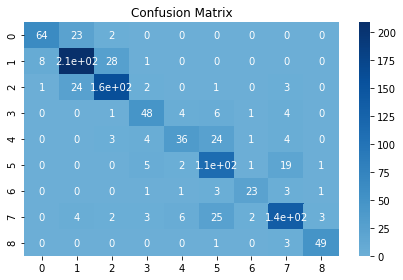

In [203]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True,cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.show()

In [125]:
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           1       0.88      0.72      0.79        89
           2       0.80      0.85      0.83       246
           3       0.82      0.84      0.83       190
           4       0.75      0.75      0.75        64
           5       0.73      0.50      0.60        72
           6       0.65      0.80      0.72       140
           7       0.82      0.72      0.77        32
           8       0.79      0.75      0.77       181
           9       0.91      0.92      0.92        53

    accuracy                           0.78      1067
   macro avg       0.79      0.76      0.77      1067
weighted avg       0.79      0.78      0.78      1067



for knowing the most important features that affects the classifiction process 

,0
GR,0.143901
Depth,0.143432
PHIND,0.136153
ILD_log10,0.131919
PE,0.126125
RELPOS,0.110874
DeltaPHI,0.104177
NM_M,0.103419


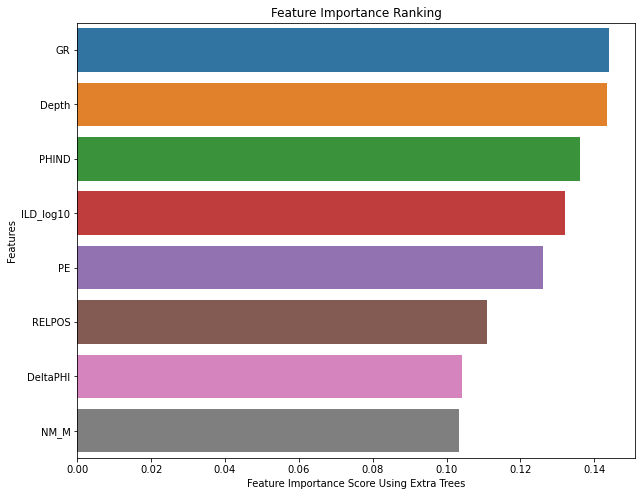

In [109]:
features_names=df.columns[3:]
features_names

plt.figure(figsize=(10,8))
feature_imp =pd.Series(fi_RFC,index=features_names).sort_values(ascending=False)
feature_imp


sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random forest classifier ')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

feature_imp=pd.DataFrame(feature_imp)
feature_imp

from the above plot , GR ,depth ,PHIND are the most important 
we can also visualize it by pair plot or Correlation matrix 


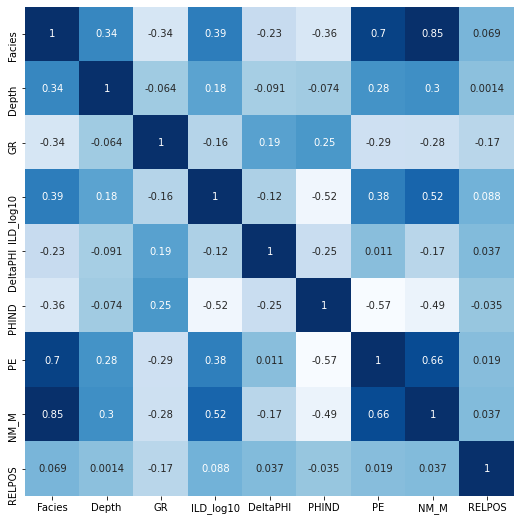

In [206]:
#correlation matrix

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True, cmap="Blues",cbar=False)
plt.show()


D:\python\New folder\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


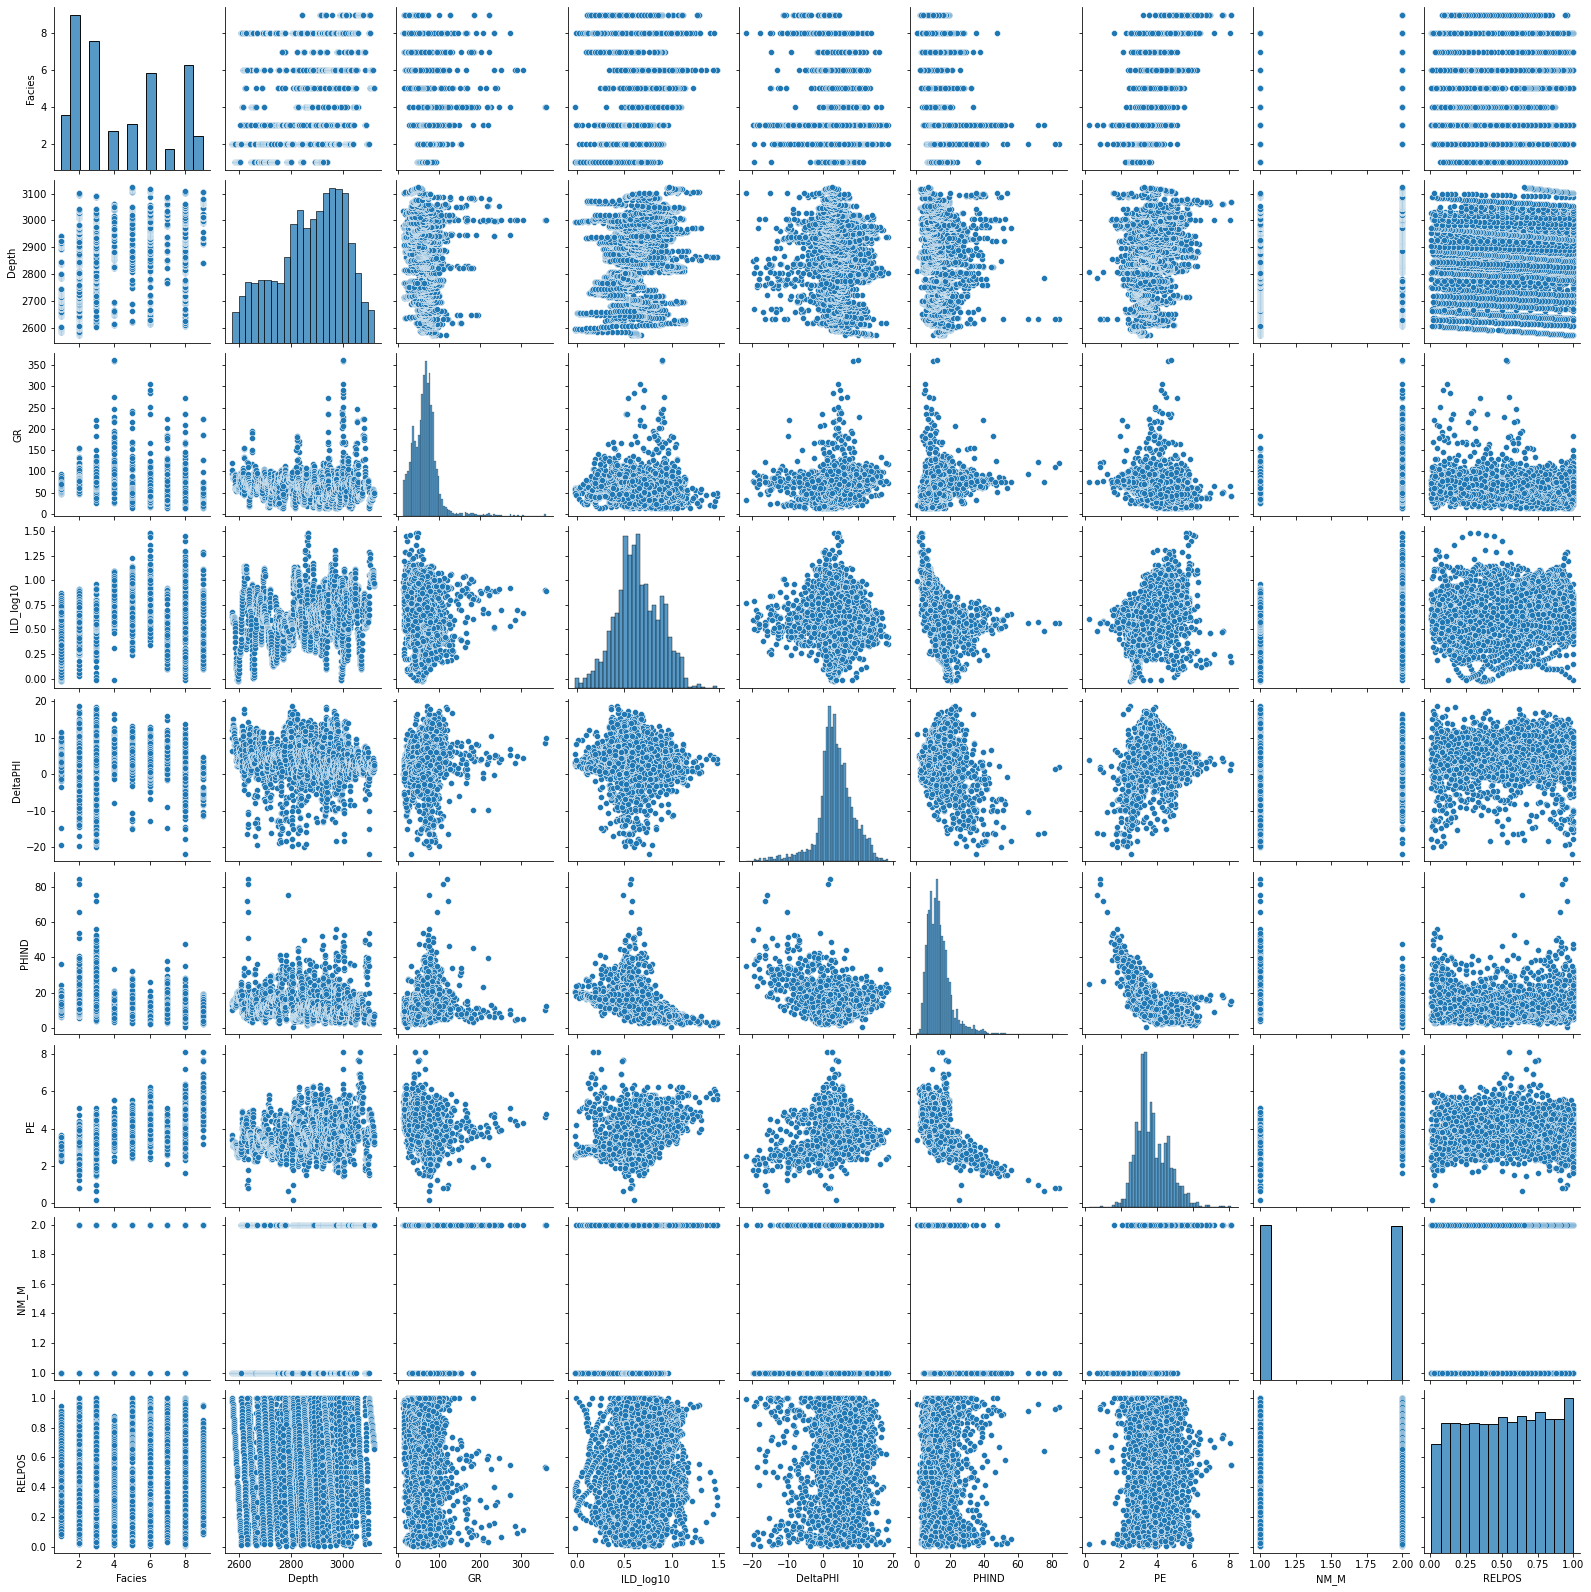

In [207]:
sns.pairplot(df, size = 2.5)
plt.show() 

Applying another classification algorithms 

In [145]:
#Applying SVC Model 

'''
sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''
for x in [ "linear","poly","sigmoid"]:
    SVCModel = SVC(kernel= x,# it can be also linear,poly,sigmoid,precomputed
                   max_iter=10000,C=100,gamma='auto',degree=3)
    SVCModel.fit(X_train, y_train)

    #Calculating Details
    print(f'SVCModel Train Score when {x} is : ' , SVCModel.score(X_train, y_train))
    print(f'SVCModel Test Score when {x} is : ' , SVCModel.score(X_test, y_test))
    #print('----------------------------------------------------')

#Calculating Prediction
y_pred = SVCModel.predict(X_test)
#print('Predicted Value for SVCModel is : ' , y_pred[:10])

D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\python\New folder\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVCModel Train Score when linear is :  0.4720554272517321
SVCModel Test Score when linear is :  0.47891283973758203


D:\python\New folder\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVCModel Train Score when poly is :  0.8341801385681293
SVCModel Test Score when poly is :  0.7047797563261481
SVCModel Train Score when sigmoid is :  0.4161662817551963
SVCModel Test Score when sigmoid is :  0.39268978444236174


from the above example, when we use poly as Kernel,it will give the best result. 

In [166]:
#Applying MLPClassifier Model 

'''
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                     alpha=0.0001,batch_size='auto’, learning_rate=’constant’,momentum=0.9,
                                     learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                                     n_iter_no_change=10, nesterovs_momentum=True,early_stopping=False, 
                                     validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,)
'''

MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='adaptive', # can be also invscaling , adaptive,constant
                                   early_stopping= False,
                                   alpha=.0010 ,hidden_layer_sizes=(300, 10),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
#print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
#print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
#print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
#print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)

D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifierModel Train Score is :  0.9288683602771363
MLPClassifierModel Test Score is :  0.7328959700093721


D:\python\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion Matrix is : 
 [[ 27  19  43   0   0   0   0   0   0]
 [ 48 112  81   0   0   2   0   3   0]
 [ 18  73  87   4   1   1   1   4   1]
 [  0   4   3  21   8  13   0  15   0]
 [  3   1   1   6  21  26   4   9   1]
 [  0   1   2   7  13  55   2  60   0]
 [  1   2   3   4   5   0  10   7   0]
 [  0   4  11  12  14  61   3  67   9]
 [  0   1   1   1   1   9   8  13  19]]
----------------------------------------------------
Accuracy Score is :  419
----------------------------------------------------
F1 Score is :  0.39268978444236174
----------------------------------------------------
Classification Report is :                precision    recall  f1-score   support

           1       0.28      0.30      0.29        89
           2       0.52      0.46      0.48       246
           3       0.38      0.46      0.41       190
           4       0.38      0.33      0.35        64
           5       0.33      0.29      0.31        72
           6       0.33      0.39      0.36       14

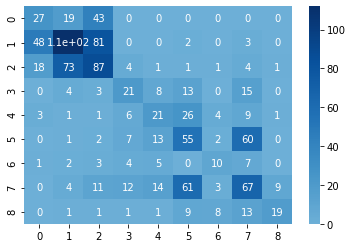

In [171]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap="Blues",annot=True)
#plt.show()

print("----------------------------------------------------")
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)
print("----------------------------------------------------")

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)
print("----------------------------------------------------")

#----------------------------------------------------
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

In [ ]:
Applying GridSearch to find the best parameters 

In [177]:
from sklearn.model_selection import GridSearchCV


#Applying LogisticRegression Model 

'''
linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''
Penality=['l1', 'l2']
Solver=[ 'lbfgs', 'liblinear', 'sag', 'saga']
selected_parameters={"penalty":Penality,"solver":Solver}


Selected_LogisticRegressionModel = LogisticRegression(C=.010,random_state=33)
GridSearchModel = GridSearchCV(Selected_LogisticRegressionModel,selected_parameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

D:\python\New folder\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\python\New folder\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\python\New folder\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\python\New folder\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversion

All Results are :
    mean_test_score  std_test_score
0              NaN             NaN
1         0.431407        0.003496
2              NaN             NaN
3         0.429097        0.004883
4         0.515474        0.000238
5         0.520555        0.001626
6         0.515474        0.000238
7         0.515474        0.000238
Best Score is : 0.5205550236131237
Best Parameters are : {'penalty': 'l2', 'solver': 'liblinear'}
Best Estimator is : LogisticRegression(C=0.01, random_state=33, solver='liblinear')


D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\pytho

Creating a pipeline 


D:\python\New folder\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\python\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline Model Train Score is :  0.6928406466512702
Pipeline Model Test Score is :  0.6260543580131209
Confusion Matrix is : 
 [[ 57  29   3   0   0   0   0   0   0]
 [ 22 180  44   0   0   0   0   0   0]
 [  0  57 124   1   4   2   0   2   0]
 [  0   0   0  39   7  14   1   3   0]
 [  0   2   4   9  19  32   2   4   0]
 [  0   0   0  14   9  84   3  30   0]
 [  0   0   0   1   1   1  20   4   5]
 [  0   3   3  11  15  38   2 100   9]
 [  0   0   0   1   1   1   0   5  45]]


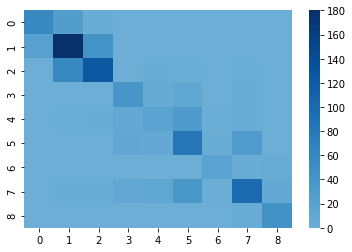

----------------------------------------------------
Accuracy Score is :  668
----------------------------------------------------
F1 Score is :  0.6260543580131209
----------------------------------------------------
Classification Report is :                precision    recall  f1-score   support

           1       0.72      0.64      0.68        89
           2       0.66      0.73      0.70       246
           3       0.70      0.65      0.67       190
           4       0.51      0.61      0.56        64
           5       0.34      0.26      0.30        72
           6       0.49      0.60      0.54       140
           7       0.71      0.62      0.67        32
           8       0.68      0.55      0.61       181
           9       0.76      0.85      0.80        53

    accuracy                           0.63      1067
   macro avg       0.62      0.61      0.61      1067
weighted avg       0.63      0.63      0.62      1067



In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', LogisticRegression())
        ]
#=======================================================================
PipelineModel = Pipeline(steps)
PipelineModel.fit(X_train, y_train)

#Calculating Details
print('Pipeline Model Train Score is : ' , PipelineModel.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , PipelineModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = PipelineModel.predict(X_test)
y_pred_proba = PipelineModel.predict_proba(X_test)
#print('Predicted Value for Pipeline Model is : ' , y_pred[:10])
#print('Predicted Probabilities Values for Pipeline Model is : ' , y_pred_proba[:10])
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap="Blues")
plt.show()

print("----------------------------------------------------")
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)


print("----------------------------------------------------")

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

print("----------------------------------------------------")
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

pipeline with grid search 

In [187]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
np.random.seed(50)
pipe = Pipeline([("clf", LogisticRegression(solver='liblinear',max_iter=200))])

log_classifier = {"clf": [LogisticRegression(solver='liblinear',max_iter=200)],
                 "clf__penalty": ['l1', 'l2'],
                 "clf__C": np.arange(0.1, 100, 20)}

ranforest_classifier = {"clf": [RandomForestClassifier(random_state=0)],
                        "clf__n_estimators": np.arange(10, 300, 10),
                        "clf__max_features": [1, 2, 3]}

grid = [ranforest_classifier,log_classifier]

gridsearch_models = GridSearchCV(pipe, grid, cv=5, verbose=0,n_jobs=-1)
Best_modelM = gridsearch_models.fit(X_train, y_train)

print(Best_modelM.best_estimator_.get_params()["clf"])
y_BM=Best_modelM.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_BM))

D:\python\New folder\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


RandomForestClassifier(max_features=3, n_estimators=280, random_state=0)
              precision    recall  f1-score   support

           1       0.88      0.73      0.80        89
           2       0.80      0.84      0.82       246
           3       0.81      0.83      0.82       190
           4       0.74      0.72      0.73        64
           5       0.73      0.50      0.60        72
           6       0.63      0.81      0.71       140
           7       0.76      0.69      0.72        32
           8       0.78      0.72      0.75       181
           9       0.87      0.91      0.89        53

    accuracy                           0.77      1067
   macro avg       0.78      0.75      0.76      1067
weighted avg       0.78      0.77      0.77      1067

